In [175]:
# DataFrame Preprocess
import pandas as pd
import numpy as np

# Data Split
from sklearn.model_selection import train_test_split

# Pipeline processing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV


#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error,r2_score

# PCA
from sklearn.decomposition import PCA

# Models
from sklearn import ensemble


In [176]:
df_train = pd.read_csv('home-data-for-ml-course/train.csv')
X_test = pd.read_csv('home-data-for-ml-course/test.csv')
y_test = pd.read_csv('home-data-for-ml-course/sample_submission.csv')

print(df_train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [177]:
print(df_train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [178]:
# Compte le nombre de valeurs manquantes
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


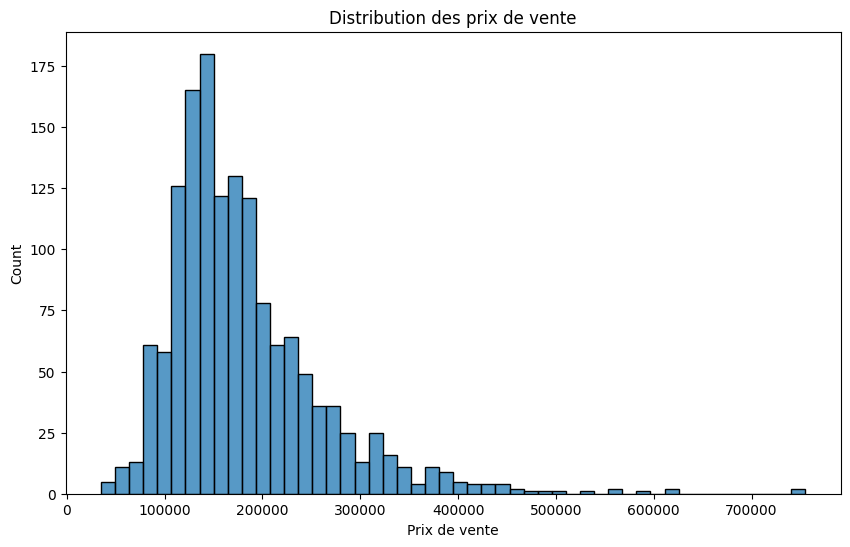

In [179]:
# Distribution de la variable cible
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], bins=50)
plt.title('Distribution des prix de vente')
plt.xlabel('Prix de vente')
plt.show()

In [180]:
df_train.columns = df_train.columns.str.strip()
X_test.columns = X_test.columns.str.strip()
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [181]:
X_train = df_train.drop(columns=['SalePrice'])
y_train = df_train['SalePrice']

In [182]:
# Corrélations avec le prix de vente
numerical_cols = df_train.select_dtypes(include=[np.number]).columns
correlations = df_train[numerical_cols].corr()['SalePrice'].sort_values(ascending=False)
print("\n=== Top 10 des corrélations avec le prix de vente ===")
print(correlations[:10])
    


=== Top 10 des corrélations avec le prix de vente ===
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [183]:
# Select numerical columns only
X_num = X_train.select_dtypes(include=[np.number]).columns.to_list()

# Select categorical columns only
X_cat = X_train.select_dtypes(include=[object]).columns.to_list()

print(X_num)
print(X_cat)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'Gar

In [ ]:
# Définir les transformations spécifiques pour les colonnes numériques et catégorielles
numeric_features = X_num
categorical_features = X_cat

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Remplace les valeurs manquantes par la moyenne
    ('scaler', StandardScaler()) # Standardise les valeurs (Moyenne = 0, Ecart-type = 1)
]) # Réduction de dimensionnalité avec PCA

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Remplace les valeurs manquantes par la valeur la plus fréquente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]) # Encodage One-Hot, ignore les valeurs inconnues qui n'ont pas été vues lors de l'entraînement

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features), # Applique les transformations numériques
        ('cat', categorical_transformer, categorical_features)]) # Applique les transformations catégorielles



In [202]:
# Définir les paramètres du modèle
params = {
    'n_estimators': 2000,
    'max_features': 15,
    'max_depth': 7,
    'learning_rate': 0.01,
    'subsample': 0.75,
}

In [203]:
model = ensemble.GradientBoostingRegressor(**params)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2n...
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=7,
                                           max_features=15, n_estimators=2000,
                                           subsample=0.75))])

In [204]:
train_predictions = pipeline.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
train_r2 = r2_score(y_train, train_predictions)
    
print("\n=== Performances du modèle ===")
print(f"RMSE sur l'ensemble d'entraînement: {train_rmse:,.0f}")
print(f"R² sur l'ensemble d'entraînement: {train_r2:.3f}")


=== Performances du modèle ===
RMSE sur l'ensemble d'entraînement: 5,858
R² sur l'ensemble d'entraînement: 0.995


In [205]:
y_pred = pipeline.predict(X_test)
y_reel = y_test['SalePrice']
test_rmse = np.sqrt(mean_squared_error(y_reel, y_pred))
test_r2 = r2_score(y_reel, y_pred)

print("\n=== Performances du modèle sur l'ensemble de test ===")
print(f"RMSE sur l'ensemble d'entraînement: {test_rmse:,.0f}")
print(f"R² sur l'ensemble d'entraînement: {test_r2:.3f}")



=== Performances du modèle sur l'ensemble de test ===
RMSE sur l'ensemble d'entraînement: 71,426
R² sur l'ensemble d'entraînement: -17.710


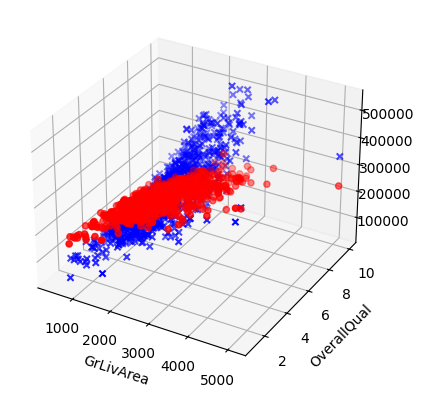

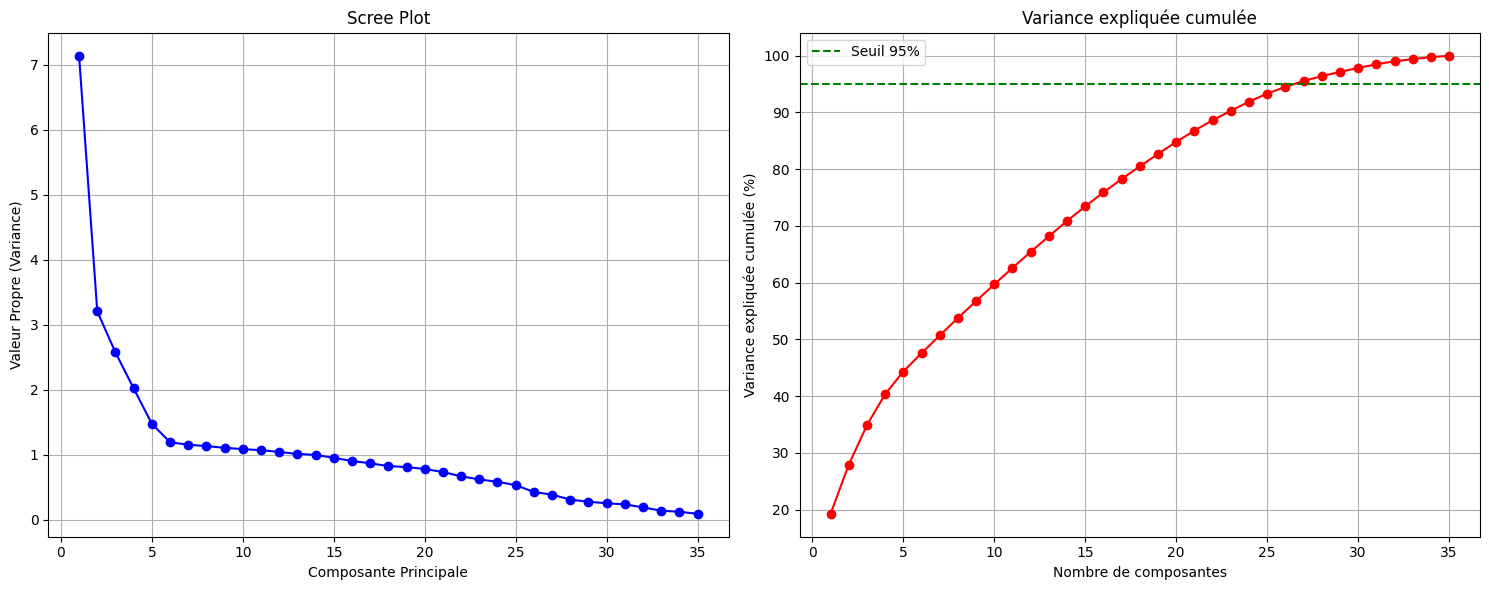


=== Analyse détaillée de la PCA ===
Nombre total de composantes initiales: 35
Nombre de composantes conservées: 35

Nombre de composantes pour 70.0% de variance: 14
Variance exacte expliquée: 70.88%

Nombre de composantes pour 80.0% de variance: 18
Variance exacte expliquée: 80.50%

Nombre de composantes pour 90.0% de variance: 23
Variance exacte expliquée: 90.31%

Nombre de composantes pour 95.0% de variance: 27
Variance exacte expliquée: 95.55%


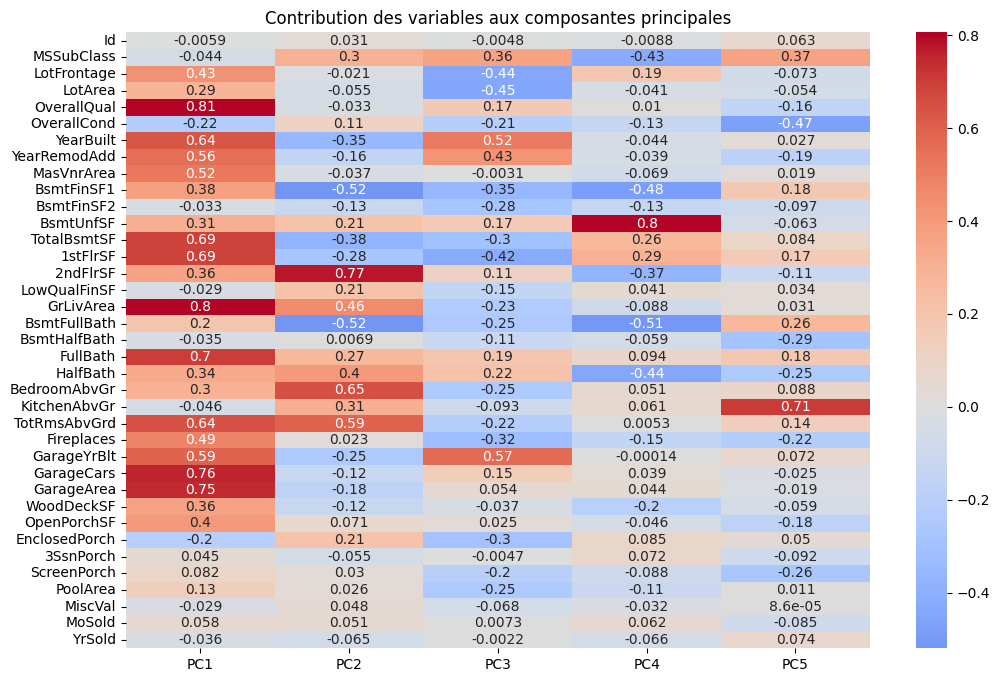

In [189]:

feature_names = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Récupération de la PCA depuis le pipeline
pca = pipeline.named_steps['preprocessor'].named_transformers_['num'].named_steps['pca']

# Récupération des variances expliquées
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Création de la figure avec 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Scree Plot
ax1.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-')
ax1.set_xlabel('Composante Principale')
ax1.set_ylabel('Valeur Propre (Variance)')
ax1.set_title('Scree Plot')
ax1.grid(True)

# 2. Variance expliquée cumulée
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), 
        cumulative_variance_ratio * 100, 'ro-')
ax2.set_xlabel('Nombre de composantes')
ax2.set_ylabel('Variance expliquée cumulée (%)')
ax2.set_title('Variance expliquée cumulée')
ax2.grid(True)

# Ajout d'une ligne horizontale à 95% pour référence
ax2.axhline(y=95, color='g', linestyle='--', label='Seuil 95%')
ax2.legend()

plt.tight_layout()
plt.show()

# Affichage des informations détaillées
print("\n=== Analyse détaillée de la PCA ===")
print(f"Nombre total de composantes initiales: {len(explained_variance)}")
print(f"Nombre de composantes conservées: {pca.n_components_}")

# Trouver le nombre de composantes nécessaires pour différents seuils
seuils = [0.7, 0.8, 0.9, 0.95]
for seuil in seuils:
    n_comp = np.argmax(cumulative_variance_ratio >= seuil) + 1
    print(f"\nNombre de composantes pour {seuil*100}% de variance: {n_comp}")
    print(f"Variance exacte expliquée: {cumulative_variance_ratio[n_comp-1]*100:.2f}%")

# Affichage des contributions des variables aux premières composantes
n_comp_show = min(5, pca.n_components_)  # On montre les 5 premières composantes ou moins
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(
    loadings[:, :n_comp_show],
    columns=[f'PC{i+1}' for i in range(n_comp_show)],
    index=feature_names
), cmap='coolwarm', center=0, annot=True)
plt.title('Contribution des variables aux composantes principales')
plt.show()

